In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# get dataset
titanic_df = pd.read_csv("Titanic-Dataset.csv")
titanic_df.head()

In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_df.shape

(891, 12)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# get mean for the age variable
mean_age = titanic_df['Age'].mean()
mean_age

29.69911764705882

In [10]:
# fill nan values of numerical columns with mean
titanic_df['Age'].fillna(mean_age, inplace=True)

In [11]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic_df.drop('Cabin', axis =1, inplace = True)

In [13]:
#fill the categorical columns with mode value

titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [14]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Select numerical columns for outlier detection
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Function to detect outliers using IQR method
def detect_outliers(df, cols):
    outliers = pd.DataFrame()
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_col], axis=0)
    return outliers

# Detect outliers in numerical columns
outliers_df = detect_outliers(titanic_df, numerical_columns)

# Display the outliers
print("Outliers in Titanic dataset:")
outliers_df

Outliers in Titanic dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.0000,S
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.000000,0,1,11767,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.000000,0,1,230433,26.0000,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,Q


In [18]:
def categorize_age(df):
    """
    Categorizes the 'Age' column in the DataFrame into age groups.

    Parameters:
    - df: DataFrame containing the Titanic dataset.

    Returns:
    - DataFrame with an additional column 'AgeGroup' containing the age labels.
    """
    # Define age categories and corresponding labels
    age_bins = [0, 12, 19, 30, 50, 65, 120]  # Define age groups: 0-12, 13-19, 20-30, 31-50, 51-65, 66-120
    age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']

    # Create a new column 'AgeGroup' based on age categories
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
    
    return df


titanic_df = pd.read_csv('Titanic-Dataset.csv')


titanic_df = categorize_age(titanic_df)

# Display the first few rows of the DataFrame with the new 'AgeGroup' column
print("Titanic dataset with AgeGroup column:")
print(titanic_df[['Age', 'AgeGroup']].head())


Titanic dataset with AgeGroup column:
    Age     AgeGroup
0  22.0  Young Adult
1  38.0        Adult
2  26.0  Young Adult
3  35.0        Adult
4  35.0        Adult


### EXPLORATORY DATA ANALYSIS

* Univariate Analysis

<Axes: xlabel='Survived', ylabel='count'>

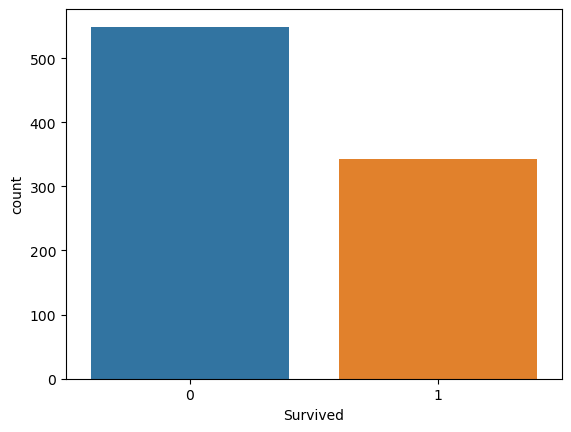

In [19]:
sns.countplot(x= 'Survived', data = titanic_df)

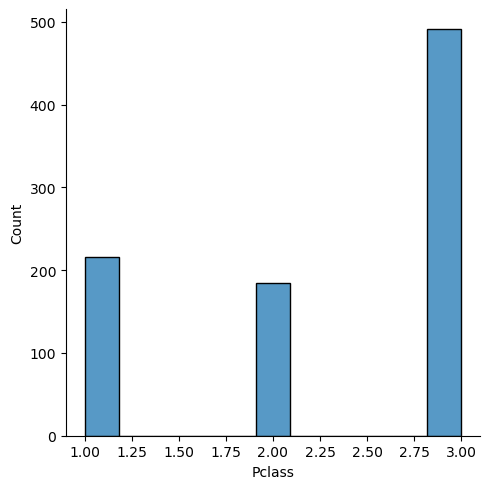

In [28]:
sns.displot(x= 'Pclass', data = titanic_df)

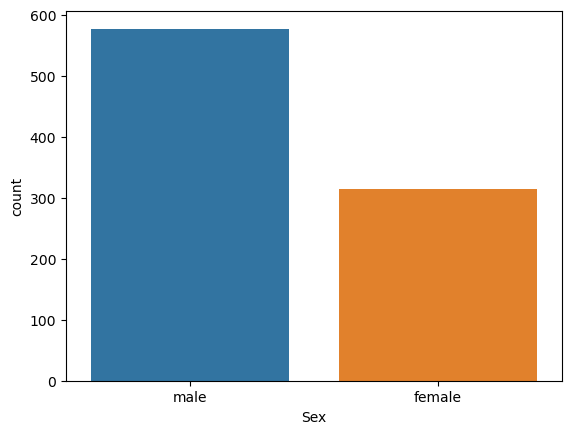

In [21]:
sns.countplot(x='Sex', data=titanic_df)
plt.show()

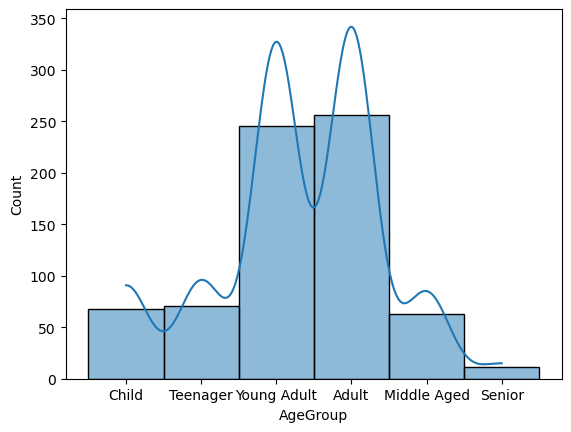

In [22]:
sns.histplot(titanic_df['AgeGroup'], kde=True)
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

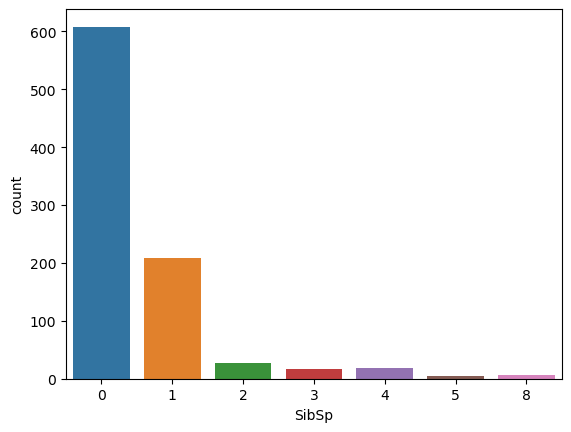

In [23]:
sns.countplot(x= 'SibSp', data = titanic_df)

<Axes: xlabel='Fare', ylabel='Density'>

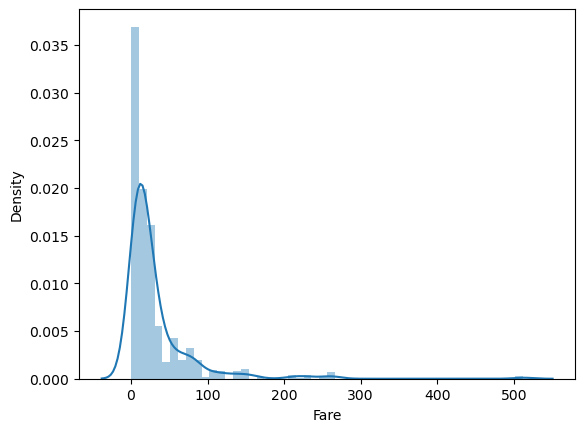

In [30]:
sns.distplot(titanic_df['Fare'])

###  Bivariate Analysis

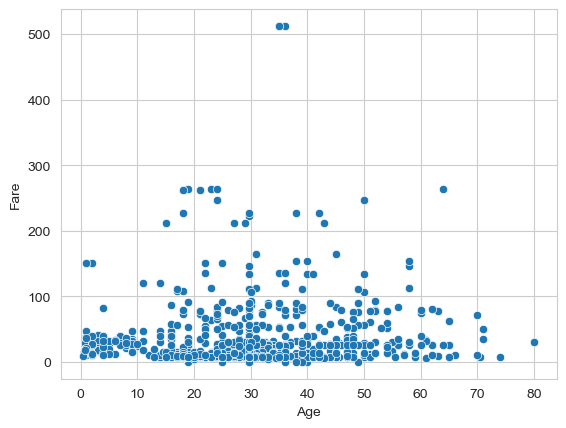

In [98]:
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.show()

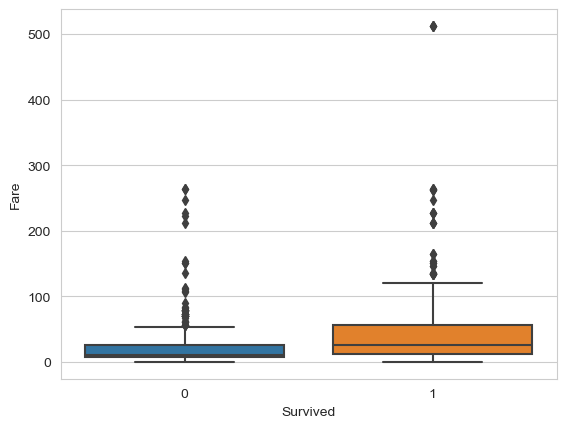

In [99]:
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.show()

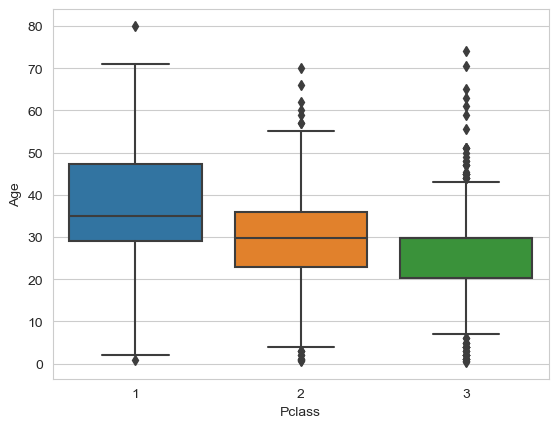

In [100]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

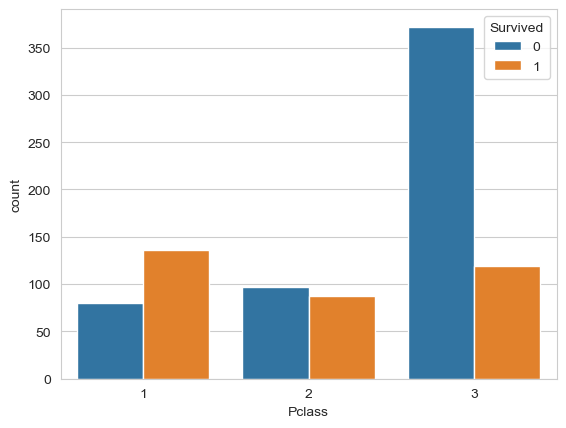

In [101]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

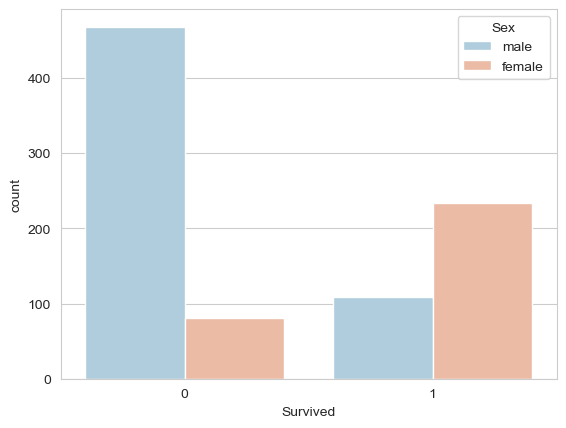

In [103]:
sns.countplot(x= 'Survived', hue = 'Sex', data = titanic_df, palette ='RdBu_r')

Text(0.5, 1.0, 'Survival Count by Passenger Class')

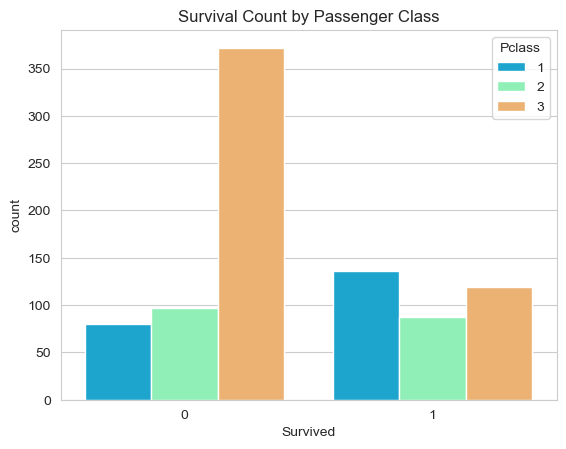

In [104]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue = 'Pclass', data = titanic_df, palette ='rainbow')
plt.title('Survival Count by Passenger Class')

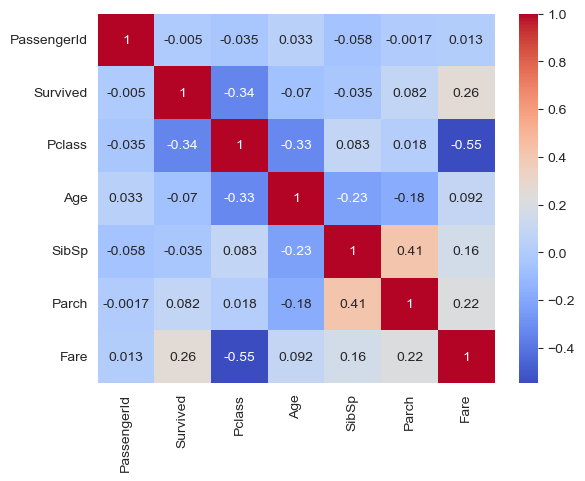

In [105]:
# Exclude non-numeric columns before calculating correlation
numeric_data = titanic_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()

# Plot correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [37]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()

In [38]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


'''

    There is a negative correlation between Plass and Fare columns, Pclass and Age & between Pclass and Survived

''' 

In [81]:
corr1 = titanic_df[['Pclass', 'Survived']].corr()

In [82]:
corr1

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


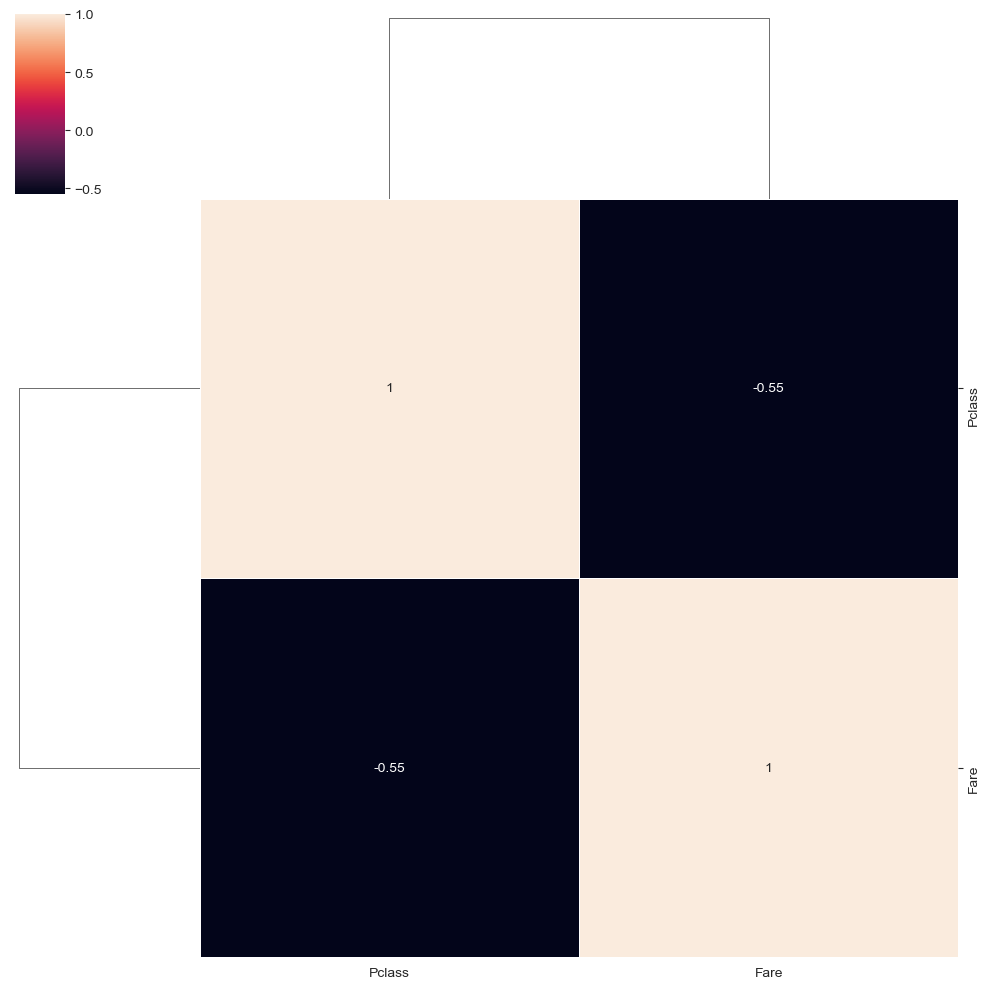

In [56]:
sns.pairplot(titanic_df)
plt.title('Pairplot')
plt.show()

In [106]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Drop unnecessary colums

In [107]:
data = data.drop(columns = ['Name', "Ticket"], axis =1)

In [108]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Label encoding

In [109]:
from sklearn.preprocessing import LabelEncoder

cols = ['Sex', 'Embarked']

le = LabelEncoder()

for col in cols:
    data[col] = le.fit_transform(data[col])

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
